In [122]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Setup plotting style
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')


# 1 Data pre-processing

In [123]:
# ! Comment out when submission
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/ami_features_24h.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
# checking missing values
df.isnull().sum().sort_values(ascending=False)

,0
lactate,2017
vasopressor_use,663
glucose,31
creatinine,23
potassium,19
sodium,19
hr_min,8
hr_mean,8
hr_max,8
age,0


In [125]:
# use median to replace
for col in ['glucose', 'creatinine', 'potassium', 'sodium', 'hr_mean', 'hr_min', 'hr_max']:
    df[col].fillna(df[col].median(), inplace=True)

# vasopressor_use: put 0 to show no use
df['vasopressor_use'].fillna(0, inplace=True)

# too many lactate values missing, remove
df.drop(columns=['lactate'], inplace=True)

# checking missing values
df.isnull().sum().sort_values(ascending=False)


,0
subject_id,0
hadm_id,0
stay_id,0
hospital_expire_flag,0
age,0
gender,0
race,0
hypertension,0
diabetes,0
copd,0


In [126]:
continuous_features = ['hr_mean', 'hr_min', 'hr_max',
                       'creatinine', 'glucose',
                       'sodium', 'potassium']
scaler = StandardScaler()

df[continuous_features] = scaler.fit_transform(df[continuous_features])
df

,subject_id,hadm_id,stay_id,hospital_expire_flag,age,gender,race,hypertension,diabetes,copd,...,hr_mean,hr_min,hr_max,creatinine,glucose,sodium,potassium,vasopressor_use,icu_expire_flag,death_30d_post_discharge
0,12012181,26862482,39532390,0,0,F,WHITE,1,0,0,...,1.652390,2.240709,0.411594,-0.350878,-0.295980,0.015247,-0.157682,0.0,0,0
1,14204585,21383476,36095793,0,1,F,BLACK/CAPE VERDEAN,0,1,0,...,0.080195,0.677263,-0.488631,-0.350878,-0.295980,0.015247,-0.157682,0.0,0,0
2,10313200,24896438,32380148,0,0,F,WHITE - OTHER EUROPEAN,0,1,1,...,-0.519808,0.075938,-0.938744,-0.350878,-0.295980,0.015247,-0.157682,0.0,0,0
3,13680152,22145795,36046814,0,0,M,ASIAN,0,0,0,...,-0.943744,-0.705785,-0.983756,-0.350878,-0.295980,0.015247,-0.157682,0.0,0,0
4,17681159,23316013,34182123,0,4,M,WHITE,0,0,0,...,-0.219626,-0.044327,-0.488631,-0.350878,-0.295980,0.015247,-0.157682,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6592,15589457,24539514,32403533,0,1,F,BLACK/AFRICAN AMERICAN,1,0,1,...,-1.202748,-0.886182,-0.533643,0.324198,0.279266,5.332575,-1.243285,1.0,0,1
6593,12363746,29652401,33655764,0,9,M,BLACK/AFRICAN AMERICAN,1,1,0,...,2.092355,0.857661,2.752181,-0.310374,0.918227,5.359928,-1.221398,1.0,0,0
6594,16482991,23627270,37471366,0,0,F,BLACK/AFRICAN AMERICAN,0,0,0,...,0.062468,0.015806,-0.173552,0.243188,-0.725595,5.441985,-2.118772,0.0,0,0
6595,12392956,29708494,30502944,0,0,F,WHITE,1,1,0,...,1.039454,0.316468,2.842204,-0.026842,4.123953,6.864316,0.770334,1.0,0,1


In [127]:
def simplify_race(race_str):
    if pd.isnull(race_str):
        return 'Unknown'
    race_str = race_str.upper()

    if 'WHITE' in race_str:
        return 'White'
    elif 'BLACK' in race_str:
        return 'Black'
    elif 'ASIAN' in race_str:
        return 'Asian'
    elif 'HISPANIC' in race_str or 'LATINO' in race_str:
        return 'Hispanic'
    elif ('PORTUGUESE' in race_str or
          'AMERICAN INDIAN' in race_str or
          'NATIVE HAWAIIAN' in race_str or
          'SOUTH AMERICAN' in race_str or
          'MULTIPLE RACE' in race_str):
        return 'Other'
    elif ('UNKNOWN' in race_str or
          'UNABLE TO OBTAIN' in race_str or
          'PATIENT DECLINED' in race_str):
        return 'Unknown'
    else:
        return 'Other'  # catch-all fallback


In [128]:
df['race_grouped'] = df['race'].apply(simplify_race)
print(df['race_grouped'].value_counts())

race_grouped
White       4165
Unknown     1164
Black        642
Other        247
Asian        198
Hispanic     181
Name: count, dtype: int64


In [129]:
# One-hot encode
df = pd.get_dummies(df, columns=['gender', 'race_grouped'], drop_first=True)


In [130]:
df

,subject_id,hadm_id,stay_id,hospital_expire_flag,age,race,hypertension,diabetes,copd,ckd,...,potassium,vasopressor_use,icu_expire_flag,death_30d_post_discharge,gender_M,race_grouped_Black,race_grouped_Hispanic,race_grouped_Other,race_grouped_Unknown,race_grouped_White
0,12012181,26862482,39532390,0,0,WHITE,1,0,0,0,...,-0.157682,0.0,0,0,False,False,False,False,False,True
1,14204585,21383476,36095793,0,1,BLACK/CAPE VERDEAN,0,1,0,1,...,-0.157682,0.0,0,0,False,True,False,False,False,False
2,10313200,24896438,32380148,0,0,WHITE - OTHER EUROPEAN,0,1,1,1,...,-0.157682,0.0,0,0,False,False,False,False,False,True
3,13680152,22145795,36046814,0,0,ASIAN,0,0,0,0,...,-0.157682,0.0,0,0,True,False,False,False,False,False
4,17681159,23316013,34182123,0,4,WHITE,0,0,0,1,...,-0.157682,0.0,0,0,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6592,15589457,24539514,32403533,0,1,BLACK/AFRICAN AMERICAN,1,0,1,0,...,-1.243285,1.0,0,1,False,True,False,False,False,False
6593,12363746,29652401,33655764,0,9,BLACK/AFRICAN AMERICAN,1,1,0,0,...,-1.221398,1.0,0,0,True,True,False,False,False,False
6594,16482991,23627270,37471366,0,0,BLACK/AFRICAN AMERICAN,0,0,0,1,...,-2.118772,0.0,0,0,False,True,False,False,False,False
6595,12392956,29708494,30502944,0,0,WHITE,1,1,0,0,...,0.770334,1.0,0,1,False,False,False,False,False,True


## **1.1 ICU mortality**

In [131]:
y_icu = df['icu_expire_flag']
X_icu = df.drop(columns=['icu_expire_flag', 'hospital_expire_flag', 'death_30d_post_discharge','subject_id','hadm_id','stay_id','race'])

X_train_icu, X_test_icu, y_train_icu, y_test_icu = train_test_split(
    X_icu, y_icu, test_size=0.2, random_state=42, stratify=y_icu
)

# standardise continuous variable
num_cols = X_train_icu.select_dtypes(include=['int64', 'float64']).columns
num_cols = [col for col in num_cols if set(X_train_icu[col].unique()) != {0,1}]

scaler = StandardScaler()
X_train_icu[num_cols] = scaler.fit_transform(X_train_icu[num_cols])
X_test_icu[num_cols] = scaler.transform(X_test_icu[num_cols])

print("ICU mortality positive rate:", y_train_icu.mean())


ICU mortality positive rate: 0.13682016297138525


## **1.2 Hospital mortality**

In [132]:
# check rate to ensure a relatively balanced dataset
df['hospital_expire_flag'].value_counts(normalize=True)


,proportion
hospital_expire_flag,
0,0.800364
1,0.199636


In [133]:
y = df['hospital_expire_flag']
X = df.drop(columns=['icu_expire_flag', 'hospital_expire_flag', 'death_30d_post_discharge','subject_id','hadm_id','stay_id','race'])

# 80% training, 20% test
X_train_hos, X_test_hos, y_train_hos, y_test_hos = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train_hos.shape)
print("Test shape:", X_test_hos.shape)
print("Train positive rate:", y_train_hos.mean())
print("Test positive rate:", y_test_hos.mean())

Train shape: (5277, 20)
Test shape: (1320, 20)
Train positive rate: 0.19954519613416713
Test positive rate: 0.2


In [134]:
num_cols = X_train_hos.select_dtypes(include=['int64', 'float64']).columns
num_cols = [col for col in num_cols if set(X_train_hos[col].unique()) != {0,1}]

scaler = StandardScaler()
X_train_hos[num_cols] = scaler.fit_transform(X_train_hos[num_cols])
X_test_hos[num_cols] = scaler.transform(X_test_hos[num_cols])


## **1.3 Post-discharge mortality**

In [135]:
y_post = df['death_30d_post_discharge']
X_post = df.drop(columns=['icu_expire_flag', 'hospital_expire_flag', 'death_30d_post_discharge','subject_id','hadm_id','stay_id','race'])

X_train_post, X_test_post, y_train_post, y_test_post = train_test_split(
    X_post, y_post, test_size=0.2, random_state=42, stratify=y_post
)

X_train_post[num_cols] = scaler.fit_transform(X_train_post[num_cols])
X_test_post[num_cols] = scaler.transform(X_test_post[num_cols])

print("Post-discharge 30-day mortality positive rate:", y_train_post.mean())


Post-discharge 30-day mortality positive rate: 0.07238961531173015


# 2 TIMI Score

In [136]:
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import roc_curve, precision_recall_curve

In [137]:
# Calculate TIMI Scores

def calculate_timi_score(row):
    score = 0

    # Age
    if 'age' in row.index:
        if row['age'] >= 75:
            score += 3
        elif row['age'] >= 65:
            score += 2

    # Diabetes or Hypertension
    has_diabetes = 0
    has_htn = 0

    if 'diabetes' in row.index and not pd.isna(row['diabetes']):
        has_diabetes = int(row['diabetes'])

    if 'hypertension' in row.index and not pd.isna(row['hypertension']):
        has_htn = int(row['hypertension'])

    if has_diabetes > 0 or has_htn > 0:
        score += 1


    # Heart Rate > 100 bpm
    if 'hr_max' in row.index and not pd.isna(row['hr_max']):
        if row['hr_max'] > 100:
            score += 2

    # Killip class II-IV approximation
    # Using HF, mechanical or vasopressor as proxies
    severe_condition = False

    if 'heart_failure' in row.index and not pd.isna(row['heart_failure']):
        severe_condition = severe_condition or (row['heart_failure'] > 0)
    if 'vasopressor_use' in row.index:
        severe_condition = severe_condition or (row['vasopressor_use'] > 0)

    if severe_condition:
        score += 2

    return score


# Calculate TIMI scores
df['timi_score'] = df.apply(calculate_timi_score, axis=1)
print(f"\nScore Statistics:")
print(df['timi_score'].describe())
print(f"\nScore Distribution:")
print(df['timi_score'].value_counts().sort_index())





Score Statistics:
count    6597.000000
mean        2.088677
std         0.979406
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: timi_score, dtype: float64

Score Distribution:
timi_score
0     572
1    1181
2    1934
3    2910
Name: count, dtype: int64



ICU Mortality:
  AUROC: 0.6003
  AUPRC: 0.1666
  Mortality rate: 13.67% (902/6597)

Hospital Mortality:
  AUROC: 0.5833
  AUPRC: 0.2315
  Mortality rate: 19.96% (1317/6597)

Post-discharge 30d:
  AUROC: 0.5165
  AUPRC: 0.0745
  Mortality rate: 7.23% (477/6597)




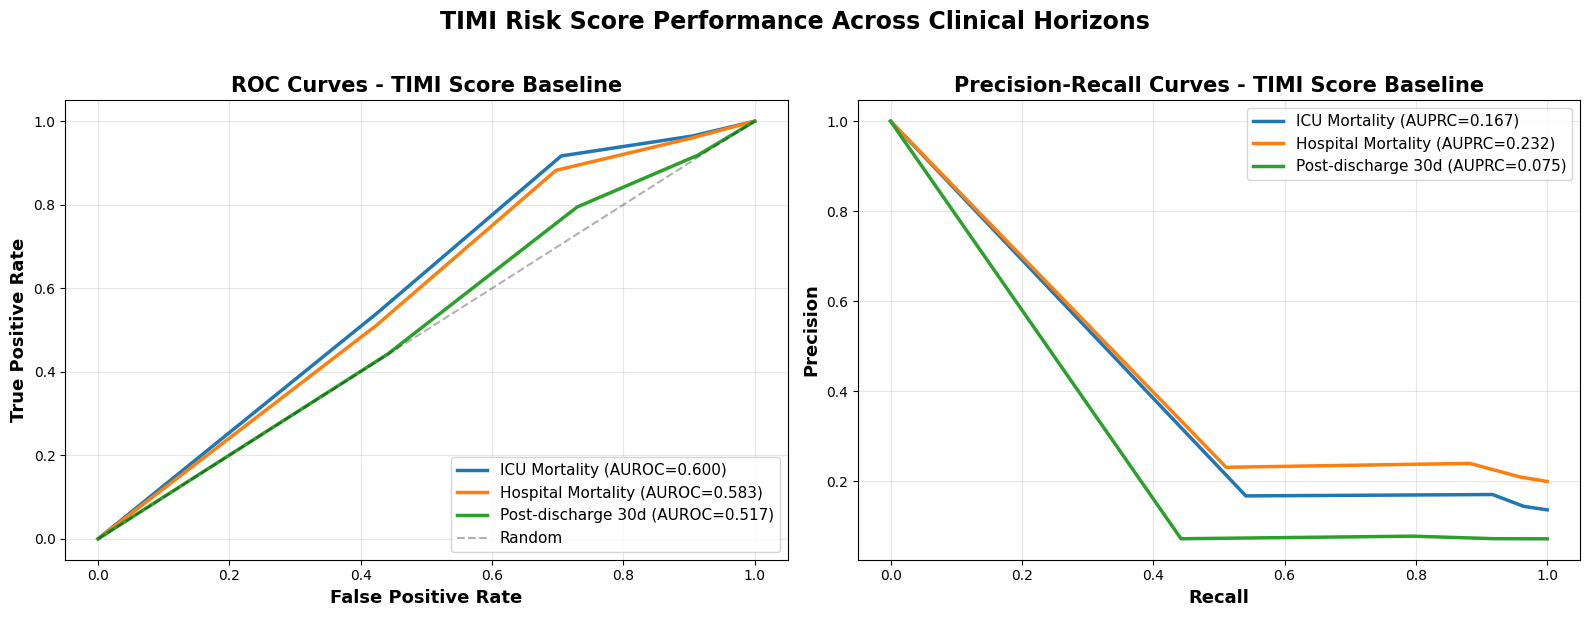

In [138]:
def evaluate_timi_for_outcome(df, outcome_col, outcome_name, ax_roc, ax_pr, color):

    # Clean data (remove NaN values)
    valid_data_mask = ~(pd.isna(df[outcome_col]) | pd.isna(df['timi_score']))
    true_labels = df.loc[valid_data_mask, outcome_col].values
    timi_scores = df.loc[valid_data_mask, 'timi_score'].values

    # Calculate performance metrics
    auroc_score = roc_auc_score(true_labels, timi_scores)
    auprc_score = average_precision_score(true_labels, timi_scores)
    mortality_rate = true_labels.mean()

    # Calculate ROC curve components
    false_positive_rates, true_positive_rates, roc_thresholds = roc_curve(true_labels, timi_scores)

    # Calculate Precision-Recall curve components
    precision_values, recall_values, pr_thresholds = precision_recall_curve(true_labels, timi_scores)

    # Plot ROC curve
    ax_roc.plot(false_positive_rates, true_positive_rates,
                linewidth=2.5, color=color,
                label=f'{outcome_name} (AUROC={auroc_score:.3f})')

    # Plot Precision-Recall curve
    ax_pr.plot(recall_values, precision_values,
               linewidth=2.5, color=color,
               label=f'{outcome_name} (AUPRC={auprc_score:.3f})')

    # Print results to console
    num_deaths = int(true_labels.sum())
    num_patients = len(true_labels)

    print(f"\n{outcome_name}:")
    print(f"  AUROC: {auroc_score:.4f}")
    print(f"  AUPRC: {auprc_score:.4f}")
    print(f"  Mortality rate: {mortality_rate:.2%} ({num_deaths}/{num_patients})")

    # Return results as dictionary
    return {
        'Outcome': outcome_name,
        'AUROC': auroc_score,
        'AUPRC': auprc_score,
        'Mortality_Rate': f"{mortality_rate:.2%}",
        'N_Samples': num_patients
    }

def categorize_risk(timi_score):

    if timi_score == 0:
        return 'Low Risk (0)'
    elif timi_score <= 2:
        return 'Moderate Risk (1-2)'
    else:  # 3
        return 'High Risk (3)'


def create_risk_stratification_table(df, outcome_col):
    df_temp = df.copy()
    df_temp['risk_category'] = df_temp['timi_score'].apply(categorize_risk)

    # Calculate statistics by risk category
    risk_stats = df_temp.groupby('risk_category')[outcome_col].agg([
        ('N_Patients', 'count'),
        ('N_Deaths', 'sum'),
        ('Mortality_Rate', lambda x: f"{x.mean():.1%}")
    ])

    # Reorder categories from low to high risk
    category_order = ['Low Risk (0)', 'Moderate Risk (1-2)', 'High Risk (3)']
    risk_stats = risk_stats.reindex([cat for cat in category_order if cat in risk_stats.index])

    return risk_stats

# Create figure for ROC and PR curves
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
ax_roc, ax_pr = axes

# Define outcomes and colors
outcomes_config = [
    ('icu_expire_flag', 'ICU Mortality', '#1f77b4'),
    ('hospital_expire_flag', 'Hospital Mortality', '#ff7f0e'),
    ('death_30d_post_discharge', 'Post-discharge 30d', '#2ca02c')
]

# Evaluate each outcome
results_list = []
for outcome_col, outcome_name, color in outcomes_config:
    result = evaluate_timi_for_outcome(df, outcome_col, outcome_name, ax_roc, ax_pr, color)
    results_list.append(result)

print("\n")

ax_roc.plot([0, 1], [0, 1], 'k--', alpha=0.3, linewidth=1.5, label='Random')
ax_roc.set_xlabel('False Positive Rate', fontsize=13, fontweight='bold')
ax_roc.set_ylabel('True Positive Rate', fontsize=13, fontweight='bold')
ax_roc.set_title('ROC Curves - TIMI Score Baseline', fontsize=15, fontweight='bold')
ax_roc.legend(loc='lower right', fontsize=11)
ax_roc.grid(True, alpha=0.3)

ax_pr.set_xlabel('Recall', fontsize=13, fontweight='bold')
ax_pr.set_ylabel('Precision', fontsize=13, fontweight='bold')
ax_pr.set_title('Precision-Recall Curves - TIMI Score Baseline', fontsize=15, fontweight='bold')
ax_pr.legend(loc='upper right', fontsize=11)
ax_pr.grid(True, alpha=0.3)

fig.suptitle('TIMI Risk Score Performance Across Clinical Horizons',
             fontsize=17, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()




In [139]:
# Print summary table
print("PERFORMANCE SUMMARY")
summary_df = pd.DataFrame(results_list)
print("\n", summary_df.to_string(index=False))


# Risk Stratification Analysis
print("\nMORTALITY RATES BY TIMI RISK CATEGORY")

print("\n1. ICU MORTALITY:")
icu_table = create_risk_stratification_table(df, 'icu_expire_flag')
print(icu_table)

print("\n2. HOSPITAL MORTALITY:")
hosp_table = create_risk_stratification_table(df, 'hospital_expire_flag')
print(hosp_table)

print("\n3. POST-DISCHARGE 30-DAY MORTALITY:")
post_table = create_risk_stratification_table(df, 'death_30d_post_discharge')
print(post_table)



PERFORMANCE SUMMARY

            Outcome    AUROC    AUPRC Mortality_Rate  N_Samples
     ICU Mortality 0.600307 0.166627         13.67%       6597
Hospital Mortality 0.583319 0.231512         19.96%       6597
Post-discharge 30d 0.516538 0.074534          7.23%       6597

MORTALITY RATES BY TIMI RISK CATEGORY

1. ICU MORTALITY:
                     N_Patients  N_Deaths Mortality_Rate
risk_category                                           
Low Risk (0)                572        32           5.6%
Moderate Risk (1-2)        3115       382          12.3%
High Risk (3)              2910       488          16.8%

2. HOSPITAL MORTALITY:
                     N_Patients  N_Deaths Mortality_Rate
risk_category                                           
Low Risk (0)                572        54           9.4%
Moderate Risk (1-2)        3115       590          18.9%
High Risk (3)              2910       673          23.1%

3. POST-DISCHARGE 30-DAY MORTALITY:
                     N_Patients  N_De

<Figure size 640x480 with 0 Axes>

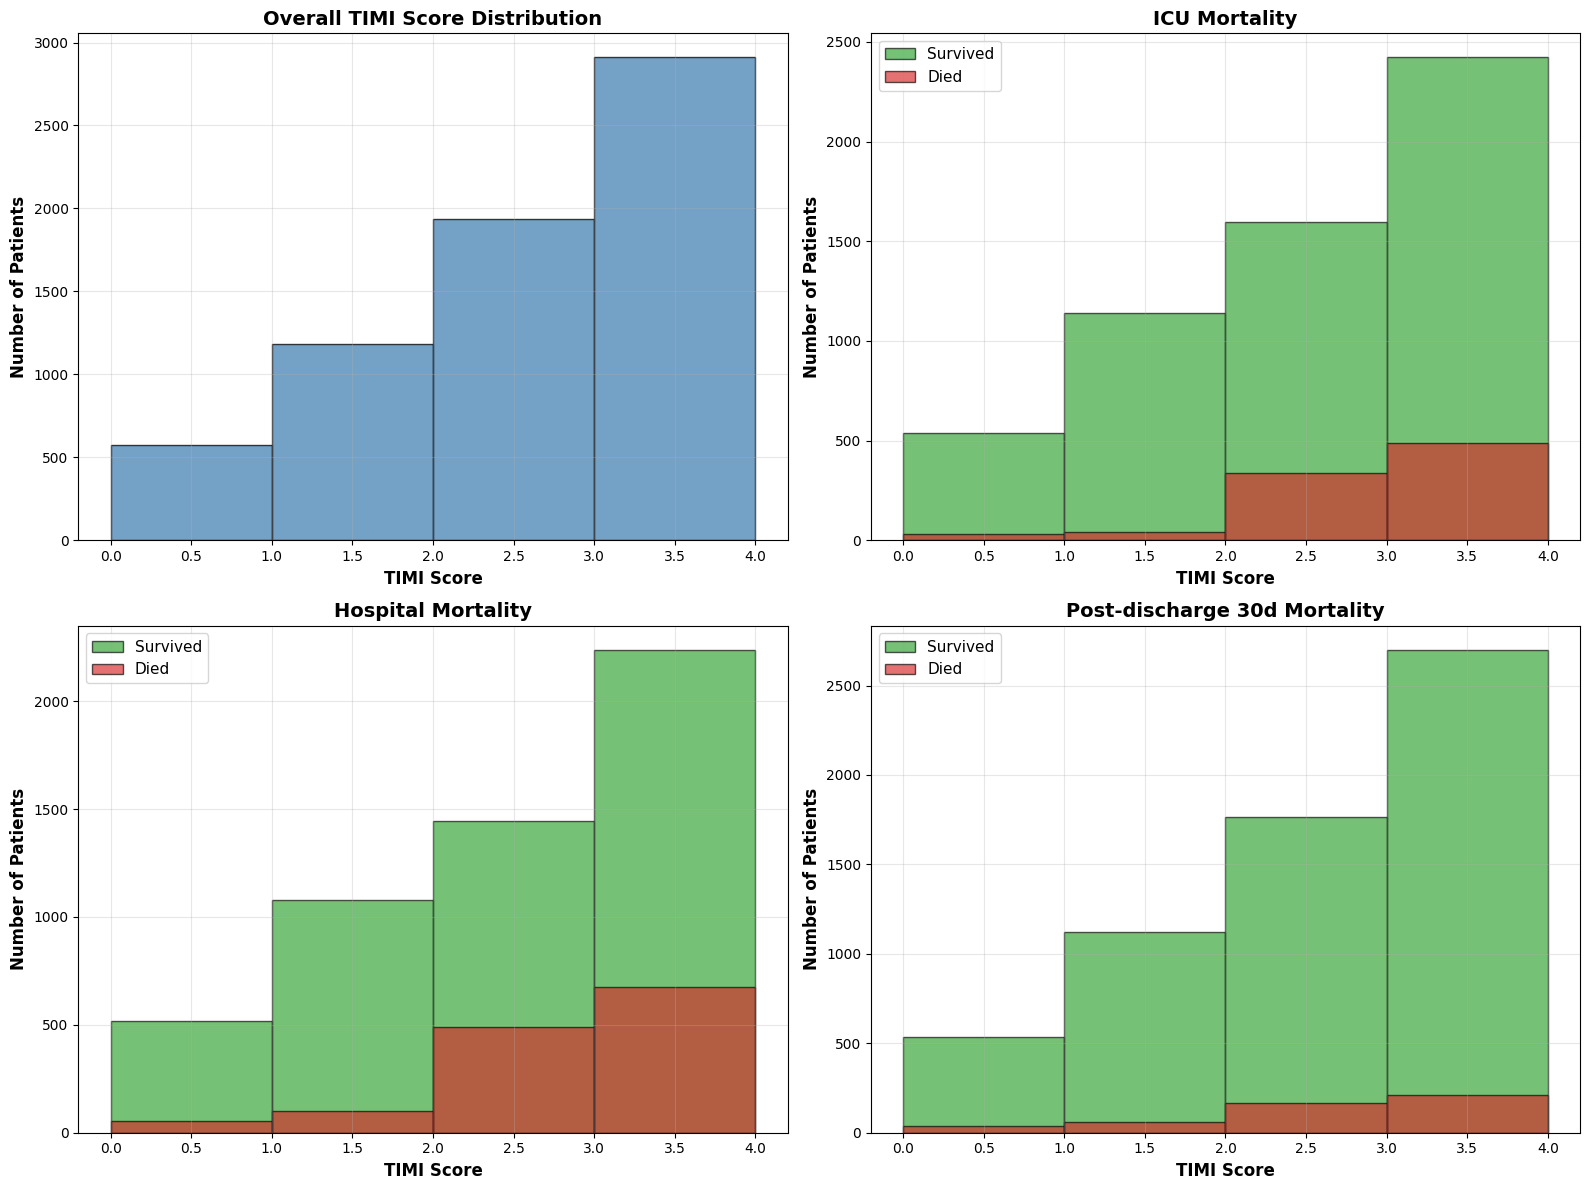

In [140]:

# Format ROC plot
ax_roc.plot([0, 1], [0, 1], 'k--', alpha=0.3, linewidth=1.5, label='Random')
ax_roc.set_xlabel('False Positive Rate', fontsize=13, fontweight='bold')
ax_roc.set_ylabel('True Positive Rate', fontsize=13, fontweight='bold')
ax_roc.set_title('ROC Curves - TIMI Score Baseline', fontsize=15, fontweight='bold')
ax_roc.legend(loc='lower right', fontsize=11)
ax_roc.grid(True, alpha=0.3)


# Format PR plot
ax_pr.set_xlabel('Recall', fontsize=13, fontweight='bold')
ax_pr.set_ylabel('Precision', fontsize=13, fontweight='bold')
ax_pr.set_title('Precision-Recall Curves - TIMI Score Baseline', fontsize=15, fontweight='bold')
ax_pr.legend(loc='upper right', fontsize=11)
ax_pr.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Distribution Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Overall distribution
axes[0, 0].hist(df['timi_score'], bins=range(0, int(df['timi_score'].max()) + 2),
                edgecolor='black', alpha=0.75, color='steelblue')
axes[0, 0].set_xlabel('TIMI Score', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Number of Patients', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Overall TIMI Score Distribution', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Distribution by outcome
plot_configs = [
    ('icu_expire_flag', 'ICU Mortality', axes[0, 1]),
    ('hospital_expire_flag', 'Hospital Mortality', axes[1, 0]),
    ('death_30d_post_discharge', 'Post-discharge 30d Mortality', axes[1, 1])
]

for outcome_col, title, ax in plot_configs:
    for val in [0, 1]:
        mask = df[outcome_col] == val
        label = 'Died' if val == 1 else 'Survived'
        color = '#d62728' if val == 1 else '#2ca02c'
        ax.hist(df.loc[mask, 'timi_score'],
                bins=range(0, int(df['timi_score'].max()) + 2),
                alpha=0.65, label=label, edgecolor='black', color=color)

    ax.set_xlabel('TIMI Score', fontsize=12, fontweight='bold')
    ax.set_ylabel('Number of Patients', fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3 Logistic Regression

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (roc_auc_score, average_precision_score,
                             roc_curve, precision_recall_curve,
                             accuracy_score, precision_score,
                             recall_score, f1_score, confusion_matrix)
import seaborn as sns

In [142]:
# Store results
lr_models = {}
lr_results = {}
lr_feature_importance = {}

outcomes_info = {
    'ICU Mortality': ('icu_expire_flag', X_train_icu, X_test_icu, y_train_icu, y_test_icu),
    'Hospital Mortality': ('hospital_expire_flag', X_train_hos, X_test_hos, y_train_hos, y_test_hos),
    'Post-discharge 30d': ('death_30d_post_discharge', X_train_post, X_test_post, y_train_post, y_test_post)
}

for outcome_name, (outcome_col, X_train, X_test, y_train, y_test) in outcomes_info.items():
    print(f"{outcome_name} :")

    # Train Logistic Regression
    lr_model = LogisticRegression(
        penalty='l2',
        C=1.0,
        solver='lbfgs',
        max_iter=1000,
        random_state=42,
        class_weight='balanced'
    )

    lr_model.fit(X_train, y_train)

    # Predictions
    y_pred_proba = lr_model.predict_proba(X_test)[:, 1]
    y_pred = lr_model.predict(X_test)

    # Calculate metrics
    auroc = roc_auc_score(y_test, y_pred_proba)
    auprc = average_precision_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Get curves
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)

    # Print results
    print(f"\nTest Set Performance:")
    print(f"  AUROC:       {auroc:.4f}")
    print(f"  AUPRC:       {auprc:.4f}")
    print(f"  Accuracy:    {accuracy:.4f}")
    print(f"  Precision:   {precision:.4f}")
    print(f"  Recall:      {recall:.4f}")
    print(f"  F1-Score:    {f1:.4f}")

    # Feature importance
    coefficients = lr_model.coef_[0]
    odds_ratios = np.exp(coefficients)

    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Coefficient': coefficients,
        'Odds_Ratio': odds_ratios,
        'Abs_Coef': np.abs(coefficients)
    }).sort_values('Abs_Coef', ascending=False)

    # Display top 10 features
    print(f"\nTop 10 Most Important Features:")
    for idx, row in importance_df.head(10).iterrows():
        print(f"  {row['Feature']:<35} OR: {row['Odds_Ratio']:>6.3f}")

    print('\n')
    # Store results
    lr_models[outcome_name] = lr_model
    lr_feature_importance[outcome_name] = importance_df

    lr_results[outcome_name] = {
        'auroc': auroc,
        'auprc': auprc,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'specificity': specificity,
        'f1_score': f1,
        'fpr': fpr,
        'tpr': tpr,
        'precision_curve': precision_vals,
        'recall_curve': recall_vals,
        'y_test': y_test,
        'y_pred_proba': y_pred_proba,
        'y_pred': y_pred
    }

ICU Mortality :

Test Set Performance:
  AUROC:       0.8078
  AUPRC:       0.4635
  Accuracy:    0.7159
  Precision:   0.2921
  Recall:      0.7611
  F1-Score:    0.4222

Top 10 Most Important Features:
  vasopressor_use                     OR:  5.575
  race_grouped_Unknown                OR:  2.086
  hr_mean                             OR:  2.012
  hr_min                              OR:  0.579
  glucose                             OR:  1.443
  race_grouped_Other                  OR:  1.407
  hypertension                        OR:  0.713
  diabetes                            OR:  0.738
  creatinine                          OR:  1.232
  race_grouped_White                  OR:  1.227


Hospital Mortality :

Test Set Performance:
  AUROC:       0.7587
  AUPRC:       0.4842
  Accuracy:    0.6962
  Precision:   0.3576
  Recall:      0.6515
  F1-Score:    0.4617

Top 10 Most Important Features:
  vasopressor_use                     OR:  3.221
  hr_mean                             OR:  1.8

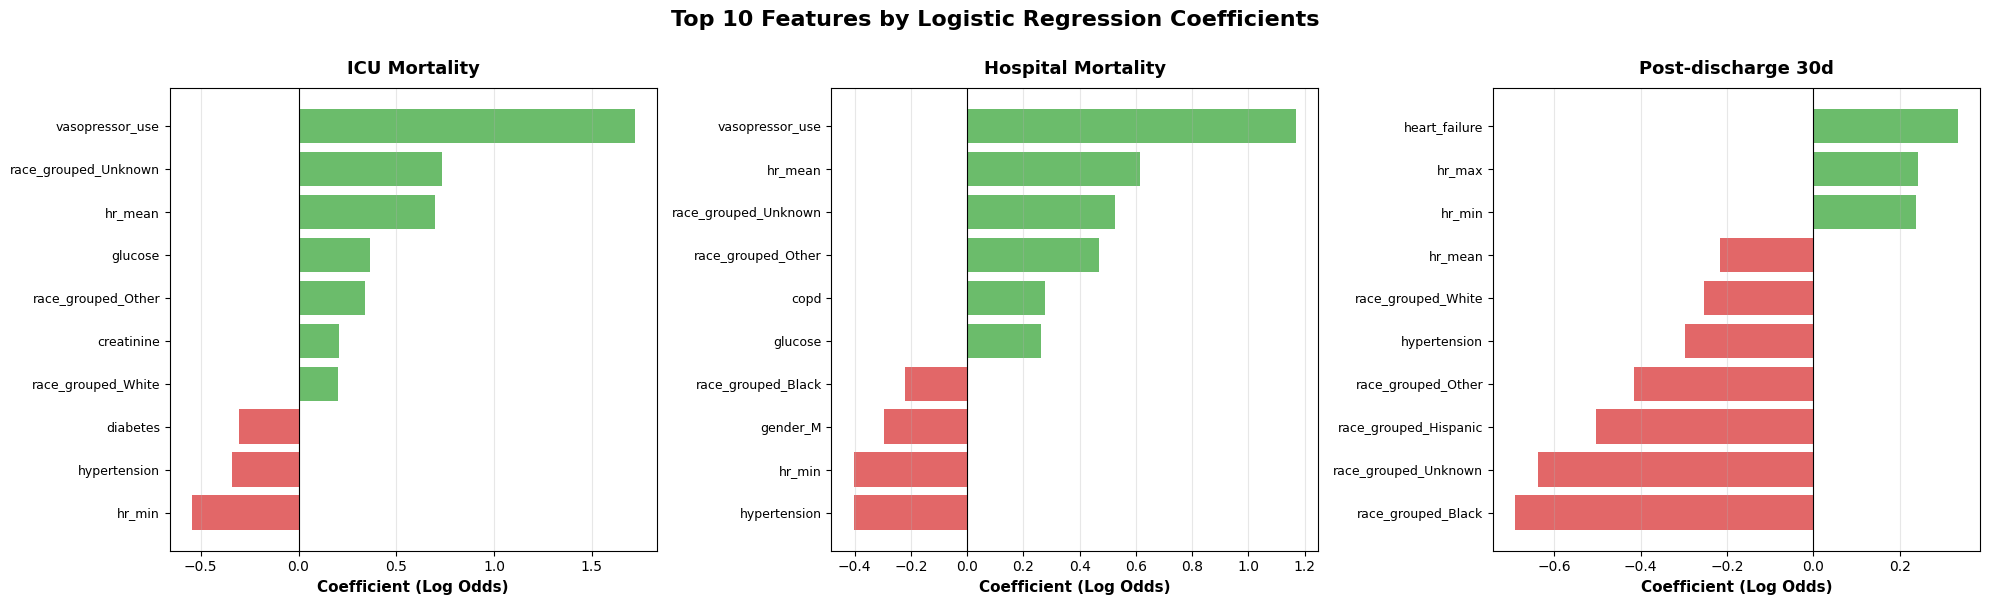

In [143]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, (outcome_name, importance_df) in enumerate(lr_feature_importance.items()):
    ax = axes[idx]

    # Get top 10 features
    top_10 = importance_df.head(10).copy()
    top_10 = top_10.sort_values('Coefficient')  # Sort for visualization

    # Color by direction
    colors_bars = ['#d62728' if x < 0 else '#2ca02c' for x in top_10['Coefficient']]

    # Create horizontal bar chart
    ax.barh(range(len(top_10)), top_10['Coefficient'], color=colors_bars, alpha=0.7)
    ax.set_yticks(range(len(top_10)))
    ax.set_yticklabels(top_10['Feature'], fontsize=9)
    ax.set_xlabel('Coefficient (Log Odds)', fontsize=11, fontweight='bold')
    ax.set_title(outcome_name, fontsize=13, fontweight='bold', pad=10)
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    ax.grid(True, alpha=0.3, axis='x')

fig.suptitle('Top 10 Features by Logistic Regression Coefficients',
             fontsize=16, fontweight='bold', y=1.00)

plt.tight_layout()
plt.show()

**Analysis**

1. **ICU & Hospital Mortality**

The use of vasopressors stands out as the strongest predictor of death in the ICU, with a coefficient above 1.0 — suggesting patients who need these drugs are 2.7 times more likely to die. Other key contributors include signs of physiological instability like elevated heart rate, glucose, and creatinine levels, as well as demographic factors such as race and underlying health conditions. On the flip side, a higher minimum heart rate and the absence of conditions like diabetes or hypertension appear to be protective, likely reflecting better baseline organ function and resilience.

2. **Post-Discharge Mortality**

The predictors of mortality after discharge look quite different from those in the ICU. Here, heart failure emerges as the most significant risk factor. Extreme heart rates — both high and low — are also associated with higher mortality, potentially indicating ongoing cardiovascular issues rather than a temporary acute episode. Interestingly, some demographic factors like certain racial groups and hypertension show large negative associations with mortality, which may reflect statistical quirks like Simpson’s paradox or selection bias — where only the relatively healthier patients survive long enough to be discharged.

3. **Model Interpretability**

One advantage of the model is its clear, interpretable structure. Clinicians can easily relate model coefficients to real-world outcomes — for example, understanding how a 10 bpm rise in heart rate affects risk. This transparency contrasts with more opaque models like LightGBM. However, the simplicity of using linear relationships limits the model’s ability to fully capture the more complex, nonlinear dynamics involved in post-discharge outcomes, especially where multiple chronic conditions interact.

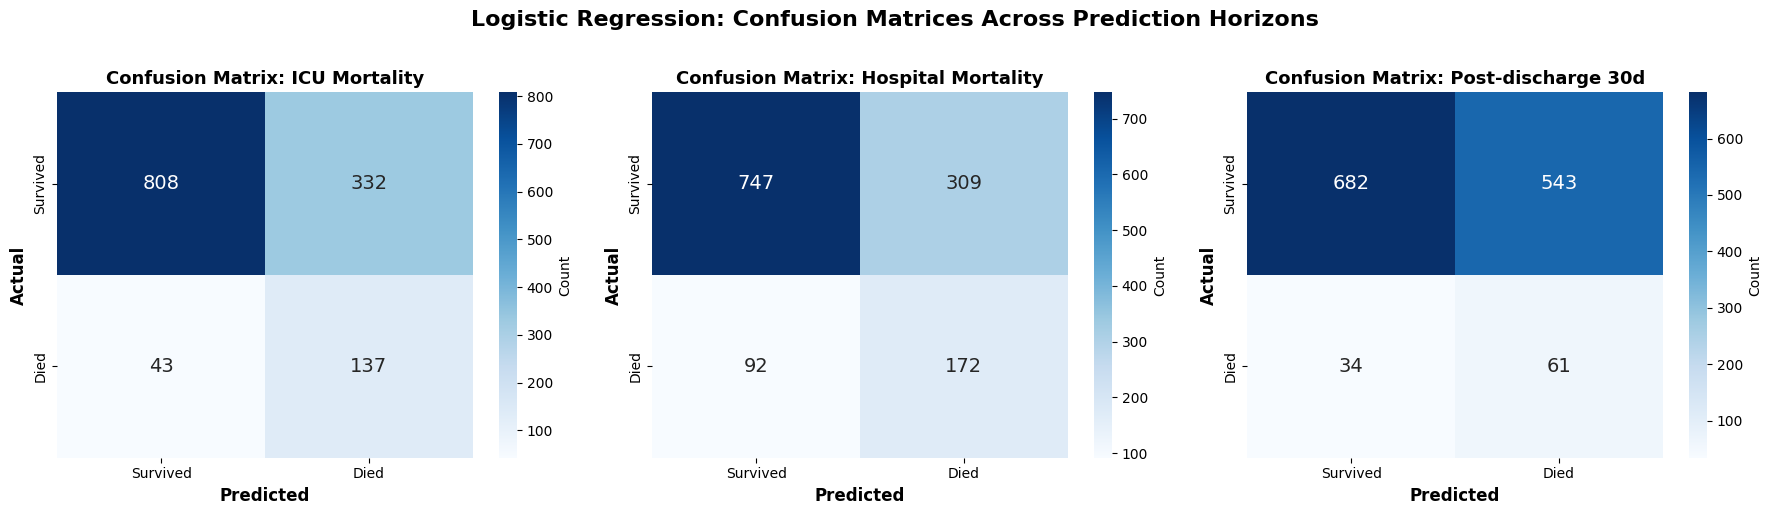

In [144]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, outcome_name in enumerate(lr_results.keys()):
    ax = axes[idx]

    y_test = lr_results[outcome_name]['y_test']
    y_pred = lr_results[outcome_name]['y_pred']

    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Survived', 'Died'],
                yticklabels=['Survived', 'Died'],
                cbar_kws={'label': 'Count'},
                ax=ax, annot_kws={'size': 14})

    ax.set_xlabel('Predicted', fontsize=12, fontweight='bold')
    ax.set_ylabel('Actual', fontsize=12, fontweight='bold')
    ax.set_title(f'Confusion Matrix: {outcome_name}', fontsize=13, fontweight='bold')

fig.suptitle('Logistic Regression: Confusion Matrices Across Prediction Horizons',
             fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.savefig('lr_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

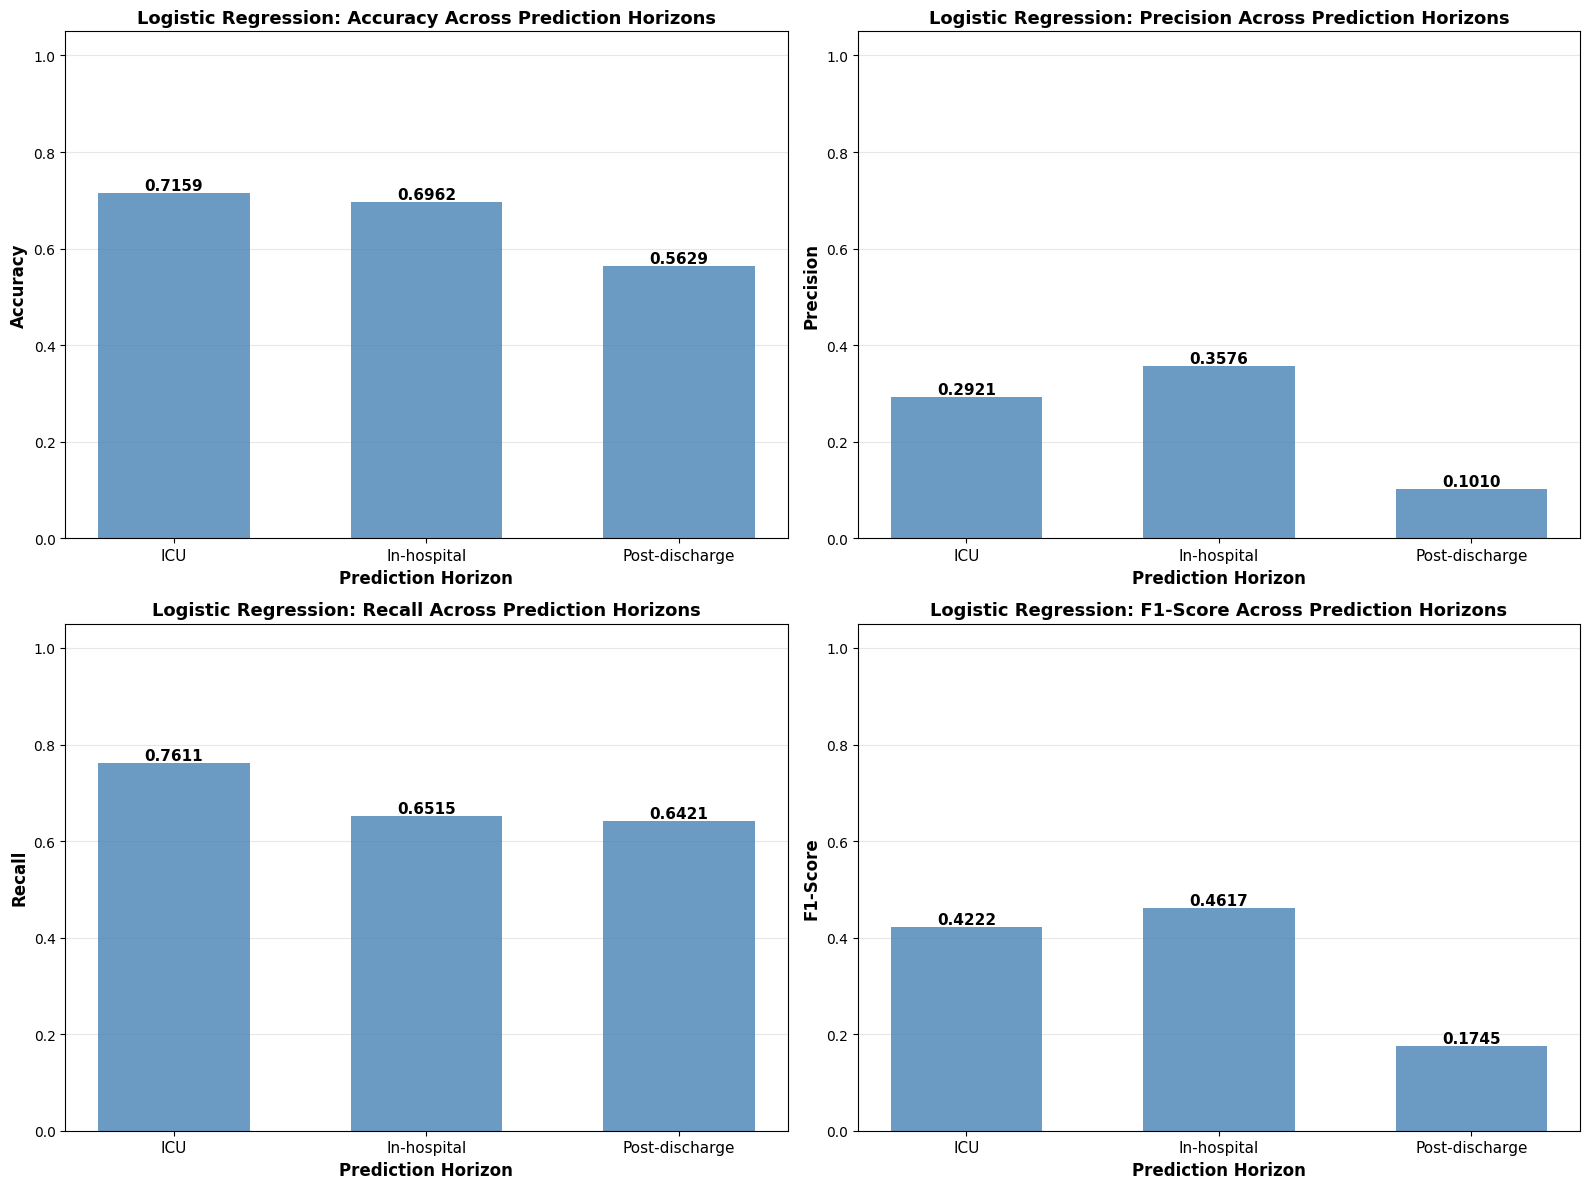

In [145]:

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

outcomes_list = list(lr_results.keys())
outcome_labels = ['ICU', 'In-hospital', 'Post-discharge']
x_pos = np.arange(len(outcomes_list))

metrics_data = {
    'Accuracy': [lr_results[o]['accuracy'] for o in outcomes_list],
    'Precision': [lr_results[o]['precision'] for o in outcomes_list],
    'Recall': [lr_results[o]['recall'] for o in outcomes_list],
    'F1-Score': [lr_results[o]['f1_score'] for o in outcomes_list]
}

for idx, (metric_name, values) in enumerate(metrics_data.items()):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]

    bars = ax.bar(x_pos, values, 0.6, color='steelblue', alpha=0.8)

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}', ha='center', va='bottom',
                fontsize=11, fontweight='bold')

    ax.set_xlabel('Prediction Horizon', fontsize=12, fontweight='bold')
    ax.set_ylabel(metric_name, fontsize=12, fontweight='bold')
    ax.set_title(f'Logistic Regression: {metric_name} Across Prediction Horizons',
                 fontsize=13, fontweight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(outcome_labels, fontsize=11)
    ax.set_ylim([0, 1.05])
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

**Anaysis**


1.   **ICU & in-hospital**: accuracy stable (~0.7) with moderate precision → reasonably reliable for short-term risk estimation.
2.   **Post-discharge**: both accuracy and precision drop sharply → indicates poor discrimination; likely impacted by sparse data and class imbalance.



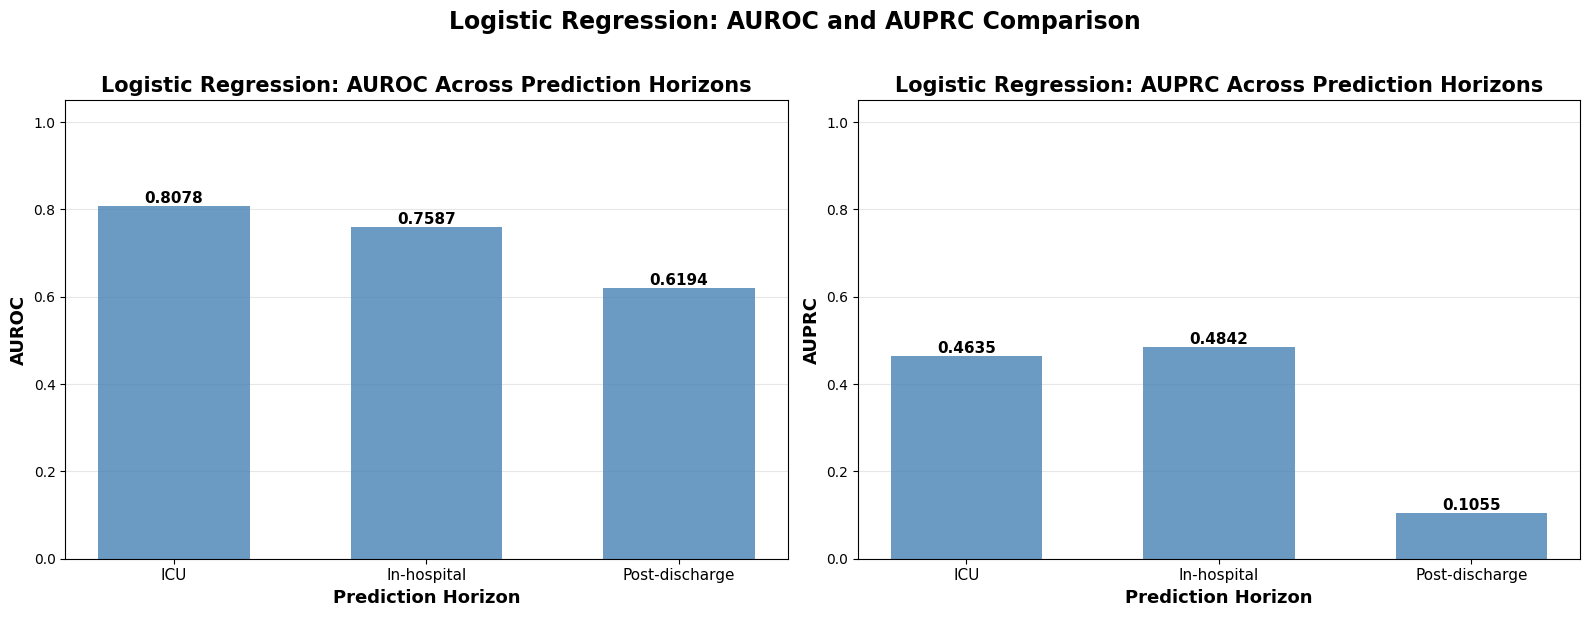

In [146]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# AUROC
auroc_values = [lr_results[o]['auroc'] for o in outcomes_list]
bars = axes[0].bar(x_pos, auroc_values, 0.6, color='steelblue', alpha=0.8)

for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.4f}', ha='center', va='bottom',
                 fontsize=11, fontweight='bold')

axes[0].set_xlabel('Prediction Horizon', fontsize=13, fontweight='bold')
axes[0].set_ylabel('AUROC', fontsize=13, fontweight='bold')
axes[0].set_title('Logistic Regression: AUROC Across Prediction Horizons',
                  fontsize=15, fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(outcome_labels, fontsize=11)
axes[0].set_ylim([0, 1.05])
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_axisbelow(True)

# AUPRC
auprc_values = [lr_results[o]['auprc'] for o in outcomes_list]
bars = axes[1].bar(x_pos, auprc_values, 0.6, color='steelblue', alpha=0.8)

for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.4f}', ha='center', va='bottom',
                 fontsize=11, fontweight='bold')

axes[1].set_xlabel('Prediction Horizon', fontsize=13, fontweight='bold')
axes[1].set_ylabel('AUPRC', fontsize=13, fontweight='bold')
axes[1].set_title('Logistic Regression: AUPRC Across Prediction Horizons',
                  fontsize=15, fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(outcome_labels, fontsize=11)
axes[1].set_ylim([0, 1.05])
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].set_axisbelow(True)

fig.suptitle('Logistic Regression: AUROC and AUPRC Comparison',
             fontsize=17, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

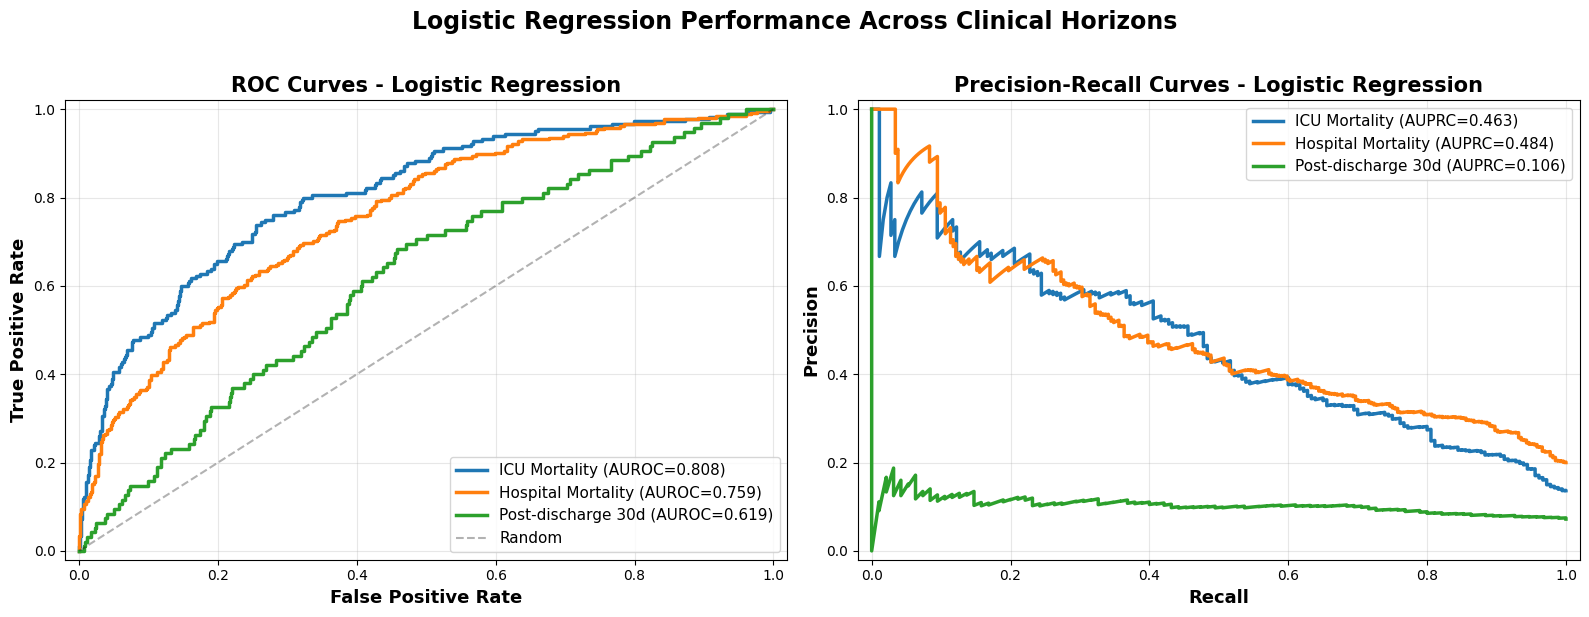

In [147]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
ax_roc, ax_pr = axes

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for idx, (outcome_name, results) in enumerate(lr_results.items()):
    color = colors[idx]

    # Plot ROC
    ax_roc.plot(results['fpr'], results['tpr'],
                linewidth=2.5, color=color,
                label=f"{outcome_name} (AUROC={results['auroc']:.3f})")

    # Plot PR
    ax_pr.plot(results['recall_curve'], results['precision_curve'],
               linewidth=2.5, color=color,
               label=f"{outcome_name} (AUPRC={results['auprc']:.3f})")

# Format ROC plot
ax_roc.plot([0, 1], [0, 1], 'k--', alpha=0.3, linewidth=1.5, label='Random')
ax_roc.set_xlabel('False Positive Rate', fontsize=13, fontweight='bold')
ax_roc.set_ylabel('True Positive Rate', fontsize=13, fontweight='bold')
ax_roc.set_title('ROC Curves - Logistic Regression', fontsize=15, fontweight='bold')
ax_roc.legend(loc='lower right', fontsize=11)
ax_roc.grid(True, alpha=0.3)
ax_roc.set_xlim([-0.02, 1.02])
ax_roc.set_ylim([-0.02, 1.02])

# Format PR plot
ax_pr.set_xlabel('Recall', fontsize=13, fontweight='bold')
ax_pr.set_ylabel('Precision', fontsize=13, fontweight='bold')
ax_pr.set_title('Precision-Recall Curves - Logistic Regression', fontsize=15, fontweight='bold')
ax_pr.legend(loc='upper right', fontsize=11)
ax_pr.grid(True, alpha=0.3)
ax_pr.set_xlim([-0.02, 1.02])
ax_pr.set_ylim([-0.02, 1.02])

fig.suptitle('Logistic Regression Performance Across Clinical Horizons',
             fontsize=17, fontweight='bold', y=1.02)

plt.tight_layout()
plt.savefig('lr_roc_pr_curves.png', dpi=300, bbox_inches='tight')
plt.show()


**Analysis**

1.   **ICU & In-hospital**: Strong discriminative performance (AUROC: 0.81 and 0.76) demonstrates the model effectively separates risk groups using early ICU physiology. AUPRC values (0.46 and 0.48) are reasonable given class imbalance, indicating clinically useful positive predictions when threshold is optimized.
2.   **Post-discharge**: Poor performance (AUROC: 0.62, AUPRC: 0.11) indicates early ICU features have limited predictive power for long-term outcomes. The near-random AUROC and extremely low AUPRC suggest this outcome requires different feature sets—likely post-discharge variables (medications, comorbidities, social factors) rather than acute physiology alone.




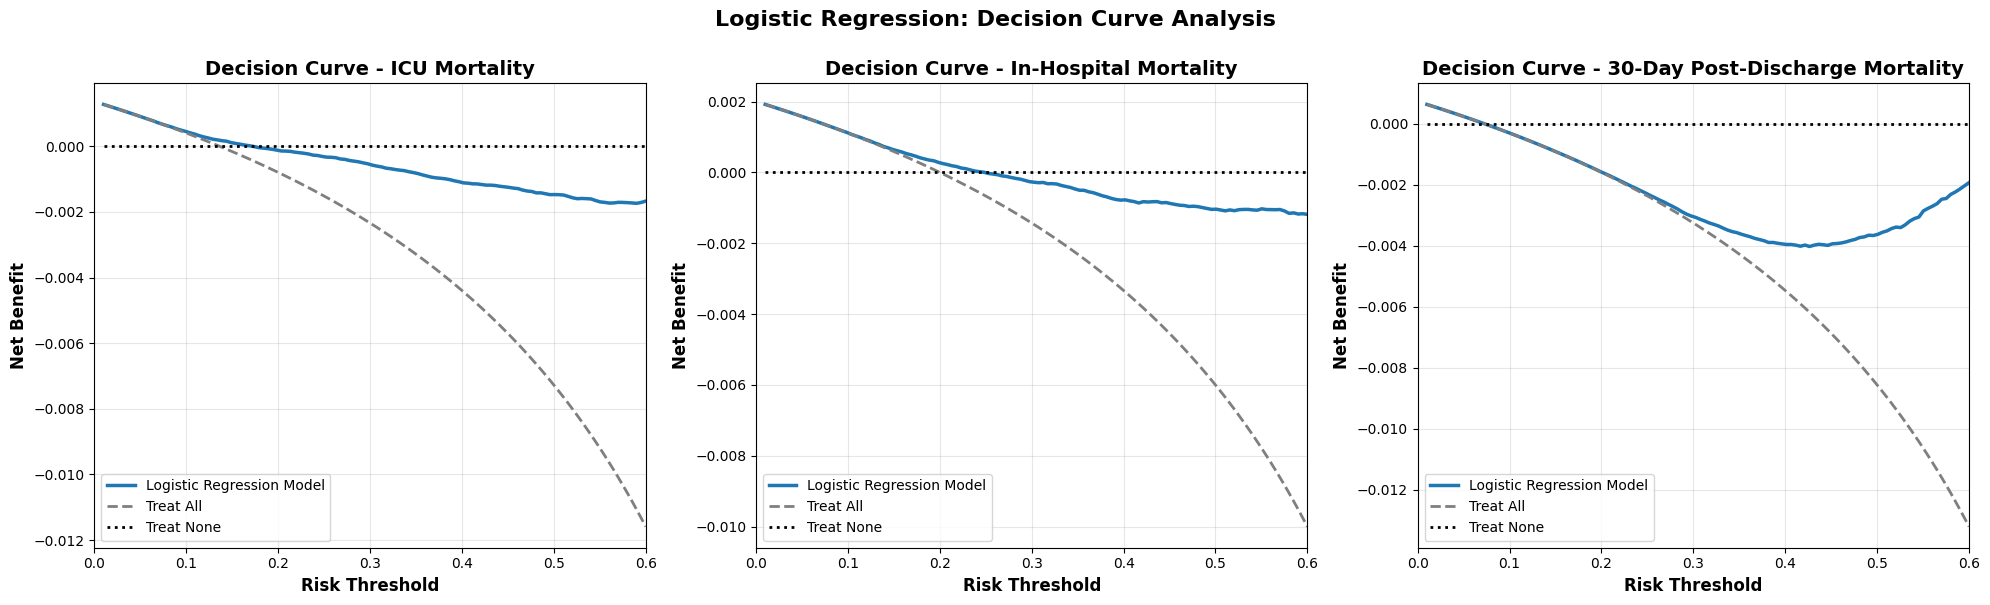

In [148]:

from dcurves import dca

# Use the thresholds avoid extremes
thresholds = np.linspace(0.01, 0.60, 120)

# Define colors/styles
MODEL_COLOR = "#1f77b4"
ALL_COLOR   = "#7f7f7f"
NONE_COLOR  = "k"
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
titles = ["ICU Mortality", "In-Hospital Mortality", "30-Day Post-Discharge Mortality"]

outcomes_list = list(lr_results.keys())

for ax, outcome_name, title in zip(axes, outcomes_list, titles):

    # Get test data from lr_results
    y_test = lr_results[outcome_name]['y_test']
    y_pred_proba = lr_results[outcome_name]['y_pred_proba']

    # Create DataFrame for dcurves
    df = pd.DataFrame({
        "outcome": y_test.astype(int),
        "prob": y_pred_proba.astype(float)
    })

    # Run DCA analysis (this computes per 100 patients)
    dca_out = dca(
        data=df,
        outcome="outcome",
        modelnames=["prob"],
        thresholds=thresholds
    )

    # Convert to per-patient scale (divide by 100)
    dca_out["net_benefit"] = dca_out["net_benefit"] / 100.0

    # Extract series for each strategy
    m_df = dca_out[dca_out["model"] == "prob"]
    a_df = dca_out[dca_out["model"] == "all"]
    n_df = dca_out[dca_out["model"] == "none"]

    # Plot decision curves
    ax.plot(m_df["threshold"], m_df["net_benefit"],
            color=MODEL_COLOR, lw=2.5, label="Logistic Regression Model")
    ax.plot(a_df["threshold"], a_df["net_benefit"],
            color=ALL_COLOR, lw=2.0, ls="--", label="Treat All")
    ax.plot(n_df["threshold"], n_df["net_benefit"],
            color=NONE_COLOR, lw=2.0, ls=":", label="Treat None")

    # Format plot
    ax.set_title(f"Decision Curve - {title}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Risk Threshold", fontsize=12, fontweight="bold")
    ax.set_ylabel("Net Benefit", fontsize=12, fontweight="bold")
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0.0, thresholds.max())

    # Set y-axis limits with padding
    ymin = min(m_df["net_benefit"].min(), a_df["net_benefit"].min(), 0)
    ymax = max(m_df["net_benefit"].max(), a_df["net_benefit"].max(), 0)
    pad = 0.05 * (ymax - ymin + 1e-9)
    ax.set_ylim(ymin - pad, ymax + pad)

    ax.legend(fontsize=10, loc="lower left")

fig.suptitle('Logistic Regression: Decision Curve Analysis',
             fontsize=16, fontweight='bold', y=1.00)

plt.tight_layout()
plt.show()


**Analysis**


The three decision curves illustrate how the **Logistic Regression** model's net benefit compares with two benchmark strategies — Treat All (assuming every patient receives intervention) and Treat None (no one receives intervention).
1. ICU Mortality: The LR curve stays slightly above "Treat All" in the very low-risk region (0-0.1), showing a peak net benefit around 0.001. Beyond this threshold, it remains close to zero or slightly negative. The model provides minimal clinical utility, offering only marginal benefit at very low thresholds.
2. In-Hospital Mortality: The model curve starts at approximately 0.002 net benefit and stays slightly higher than "Treat All" across low-to-moderate thresholds (<0.2). This suggests the model provides small but positive net benefit for early in-hospital mortality risk stratification.
3. 30-Day Post-Discharge Mortality: The model curve starts near 0.001, drops to approximately -0.004 at mid-range thresholds, then rises back toward zero. The curve frequently overlaps with or drops below "Treat None," indicating the LR model adds minimal to no clinical value for post-discharge mortality prediction.

Across all three tasks, the net benefit values are extremely small (peak ≈0.001-0.002). Even though the LR model may statistically discriminate outcomes (AUROC 0.62-0.81), it does not meaningfully improve clinical decision-making relative to simple "treat all" or "treat none" strategies.
Short-term outcomes (ICU or in-hospital mortality) show slightly higher benefit, as these are closely linked to inpatient data. However, post-discharge mortality depends heavily on unobserved post-hospital factors (follow-up care, comorbidities, social determinants), which are not captured in the ICU-based model inputs.

In [149]:
summary_data = []
for outcome_name, results in lr_results.items():
    summary_data.append({
        'Outcome': outcome_name,
        'AUROC': f"{results['auroc']:.4f}",
        'AUPRC': f"{results['auprc']:.4f}",
        'Accuracy': f"{results['accuracy']:.4f}",
        'Precision': f"{results['precision']:.4f}",
        'Recall': f"{results['recall']:.4f}",
        'F1-Score': f"{results['f1_score']:.4f}"
    })

lr_summary_df = pd.DataFrame(summary_data)
print("\n", lr_summary_df.to_string(index=False))


            Outcome  AUROC  AUPRC Accuracy Precision Recall F1-Score
     ICU Mortality 0.8078 0.4635   0.7159    0.2921 0.7611   0.4222
Hospital Mortality 0.7587 0.4842   0.6962    0.3576 0.6515   0.4617
Post-discharge 30d 0.6194 0.1055   0.5629    0.1010 0.6421   0.1745


In [150]:
# TIMI results from previous section
timi_results_map = {
    'ICU Mortality': {'auroc': 0.6945, 'auprc': 0.2309},
    'Hospital Mortality': {'auroc': 0.6330, 'auprc': 0.2797},
    'Post-discharge 30d': {'auroc': 0.4675, 'auprc': 0.0691}
}

comparison_data = []
for outcome_name in lr_results.keys():
    lr_auroc = lr_results[outcome_name]['auroc']
    lr_auprc = lr_results[outcome_name]['auprc']

    timi_auroc = timi_results_map[outcome_name]['auroc']
    timi_auprc = timi_results_map[outcome_name]['auprc']

    auroc_improvement = ((lr_auroc - timi_auroc) / timi_auroc * 100)
    auprc_improvement = ((lr_auprc - timi_auprc) / timi_auprc * 100)

    comparison_data.append({
        'Outcome': outcome_name,
        'TIMI_AUROC': f"{timi_auroc:.4f}",
        'LR_AUROC': f"{lr_auroc:.4f}",
        'AUROC_Δ%': f"{auroc_improvement:+.1f}%",
        'TIMI_AUPRC': f"{timi_auprc:.4f}",
        'LR_AUPRC': f"{lr_auprc:.4f}",
        'AUPRC_Δ%': f"{auprc_improvement:+.1f}%"
    })

comparison_df = pd.DataFrame(comparison_data)
print("\n", comparison_df.to_string(index=False))


            Outcome TIMI_AUROC LR_AUROC AUROC_Δ% TIMI_AUPRC LR_AUPRC AUPRC_Δ%
     ICU Mortality     0.6945   0.8078   +16.3%     0.2309   0.4635  +100.7%
Hospital Mortality     0.6330   0.7587   +19.9%     0.2797   0.4842   +73.1%
Post-discharge 30d     0.4675   0.6194   +32.5%     0.0691   0.1055   +52.7%
